## 2\. Data Preparation

In [1]:
import pandas as pd
from matplotlib.pyplot import figure, tight_layout, show
from dslabs_functions import *

file_tag = "TrafficTwoMonth"
filename = "datasets/TrafficTwoMonth_clean.csv"
target = "Total"
index = "datetime"

data: DataFrame = read_csv(
    filename,
    index_col=index,
    parse_dates=True,
    infer_datetime_format=True,
)
series: Series = data[target]

### 2.1\. Scaling

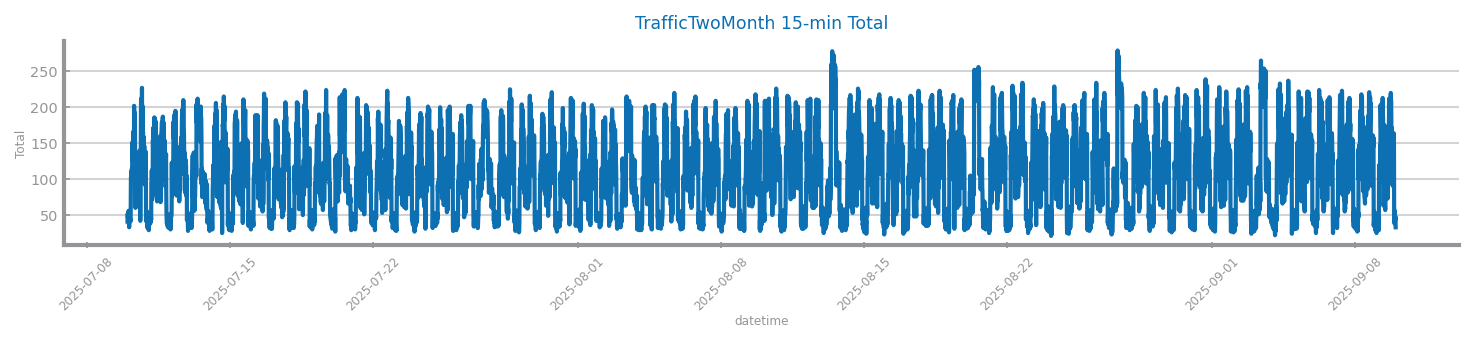

In [3]:
from sklearn.preprocessing import StandardScaler


def scale_all_dataframe(data: DataFrame) -> DataFrame:
    vars: list[str] = data.columns.to_list()
    transf: StandardScaler = StandardScaler().fit(data)
    df = DataFrame(transf.transform(data), index=data.index)
    df.columns = vars
    return df

figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} 15-min {target}",
)
show()

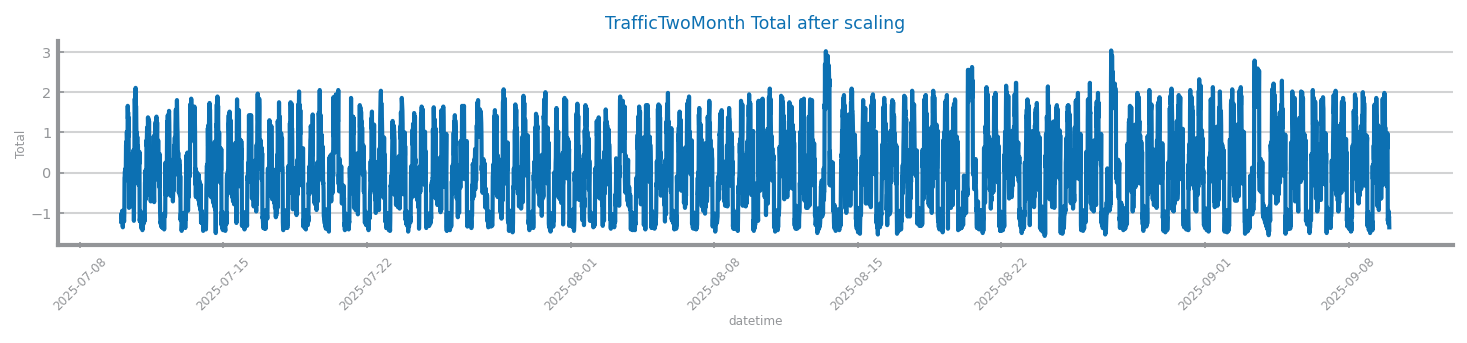

In [4]:
df: DataFrame = scale_all_dataframe(data)

ss: Series = df[target]
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    ss.index.to_list(),
    ss.to_list(),
    xlabel=ss.index.name,
    ylabel=target,
    title=f"{file_tag} {target} after scaling",
)
show()

### 2.2\. Smoothing

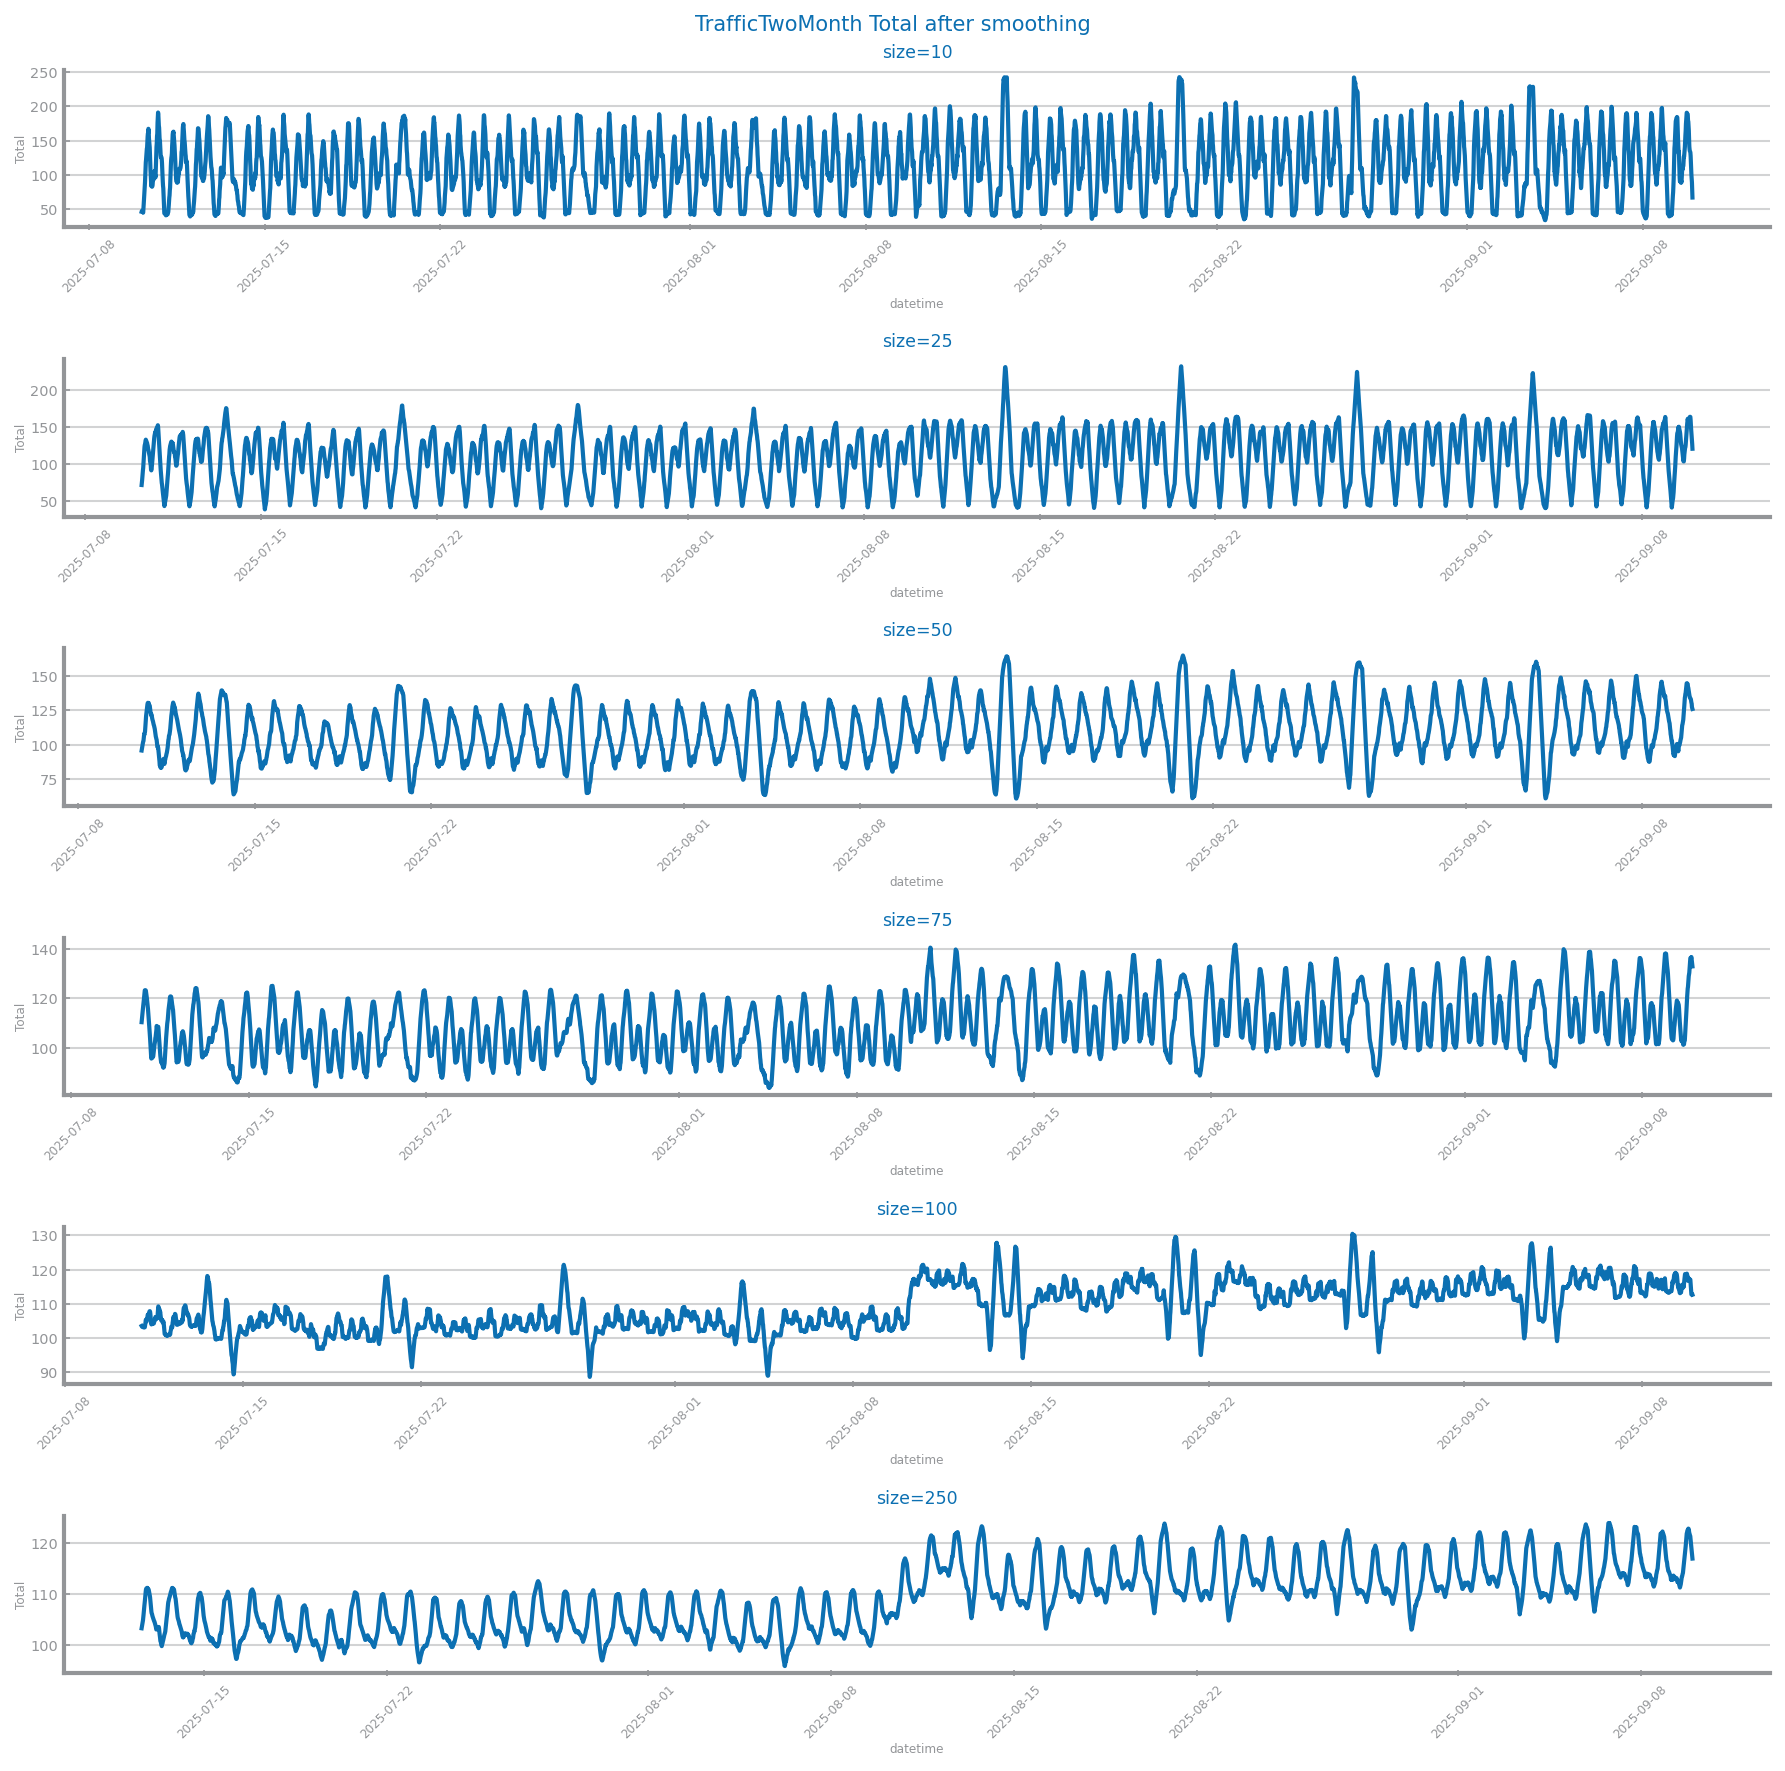

In [12]:
from matplotlib.pyplot import subplots
from matplotlib.axes import Axes
from matplotlib.figure import Figure

sizes: list[int] = [10, 25, 50, 75, 100, 250]
fig: Figure
axs: list[Axes]
fig, axs = subplots(len(sizes), 1, figsize=(3 * HEIGHT, HEIGHT / 2 * len(sizes)))
fig.suptitle(f"{file_tag} {target} after smoothing")

for i in range(len(sizes)):
    ss_smooth: Series = series.rolling(window=sizes[i]).mean()
    plot_line_chart(
        ss_smooth.index.to_list(),
        ss_smooth.to_list(),
        ax=axs[i],
        xlabel=ss_smooth.index.name,
        ylabel=target,
        title=f"size={sizes[i]}",
    )
tight_layout()
show()

### 2.3\. Aggregation

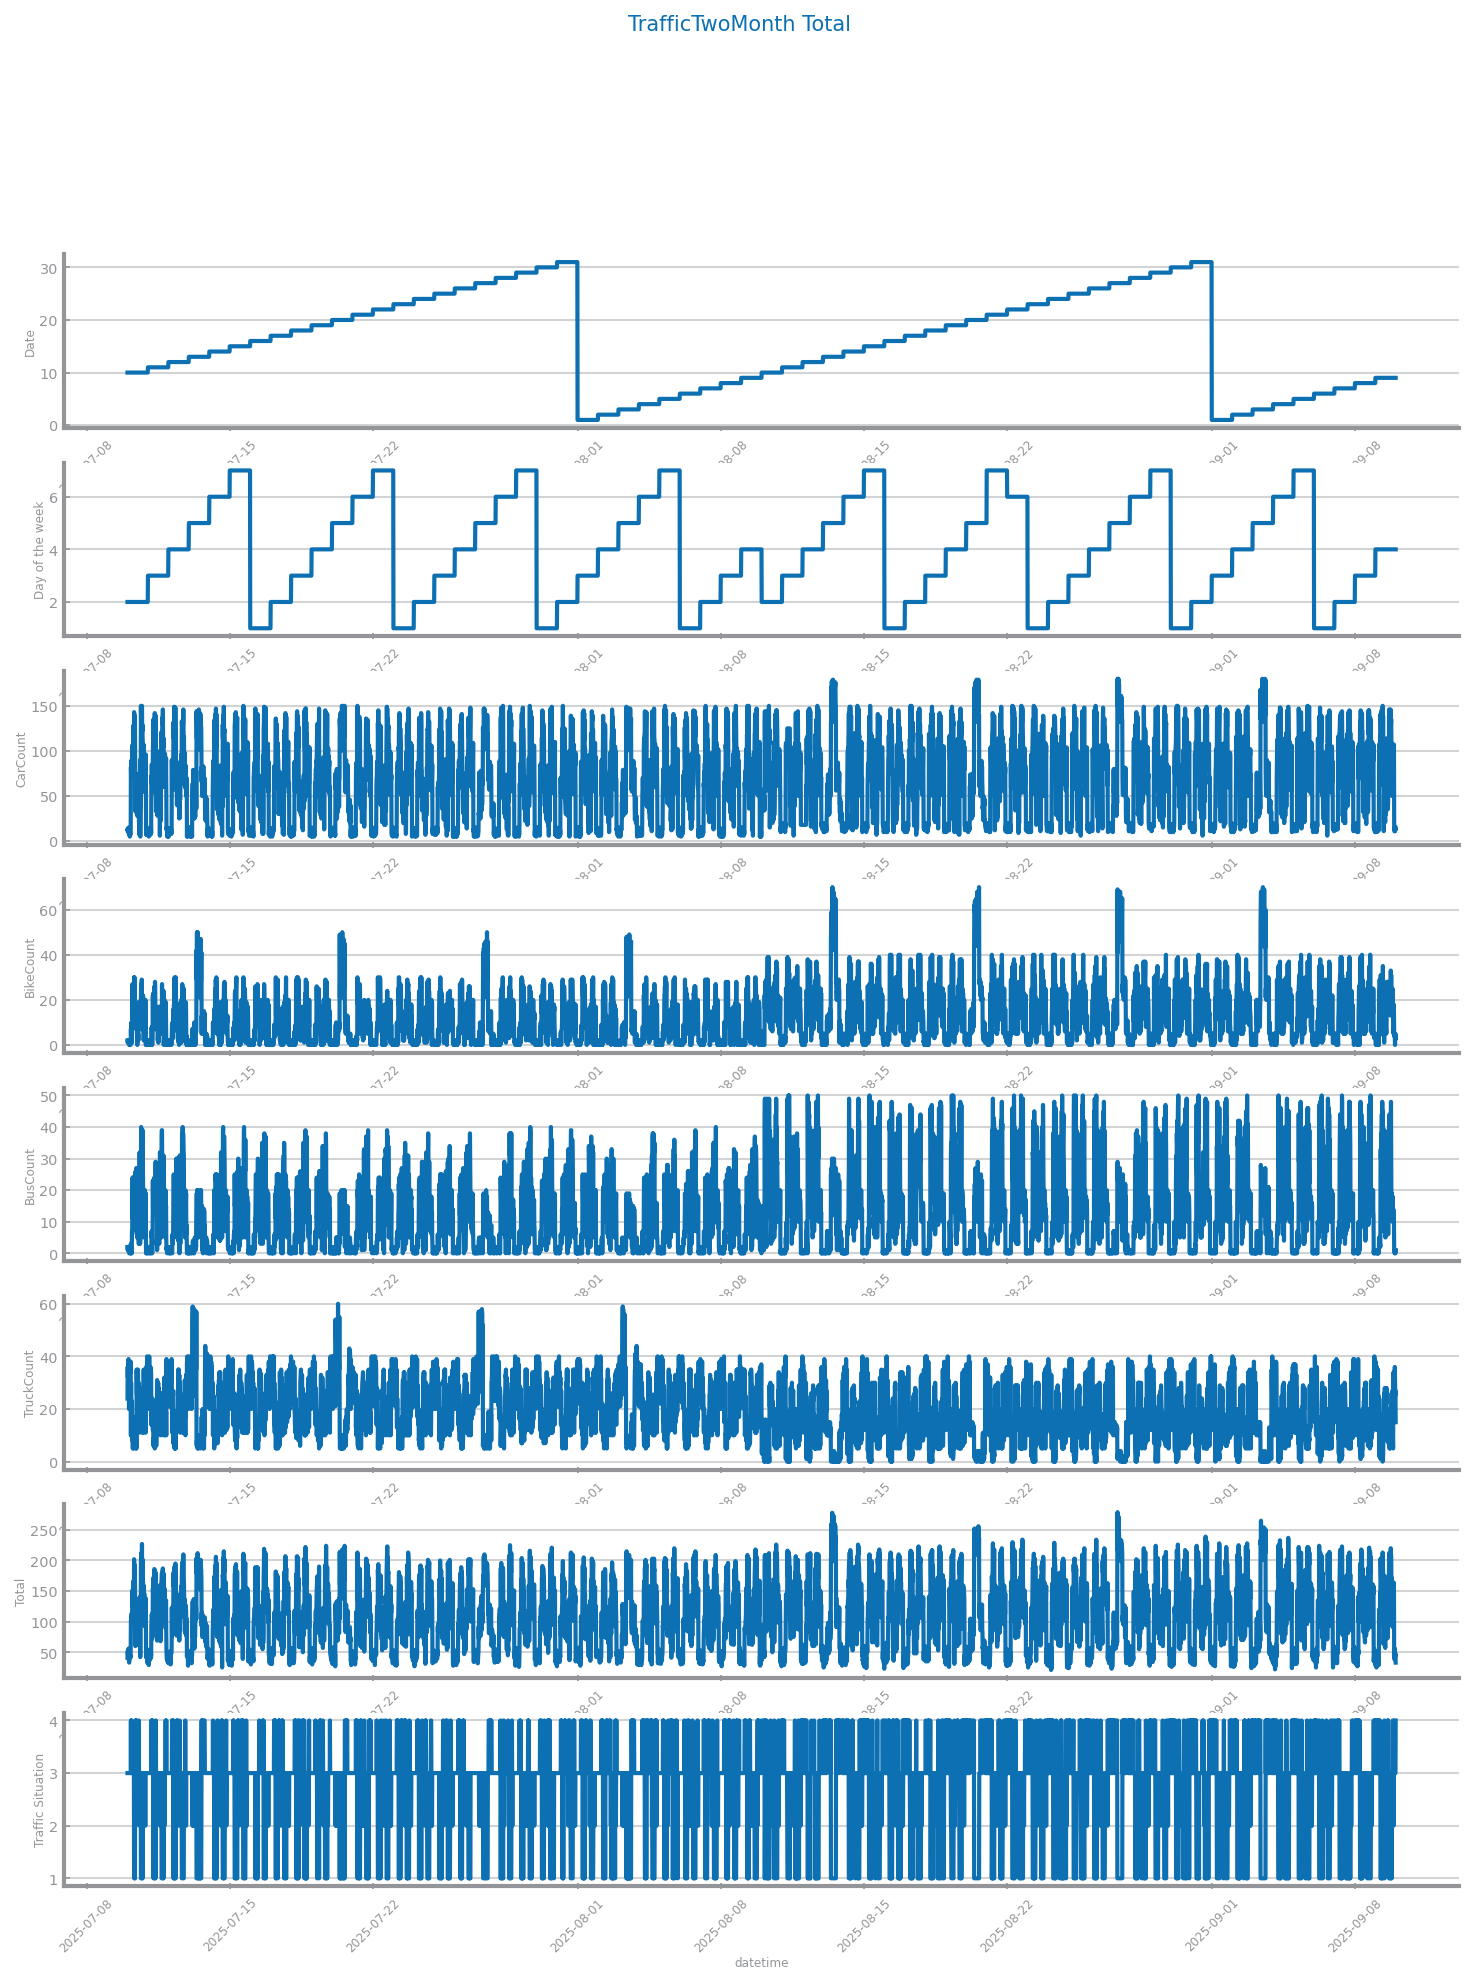

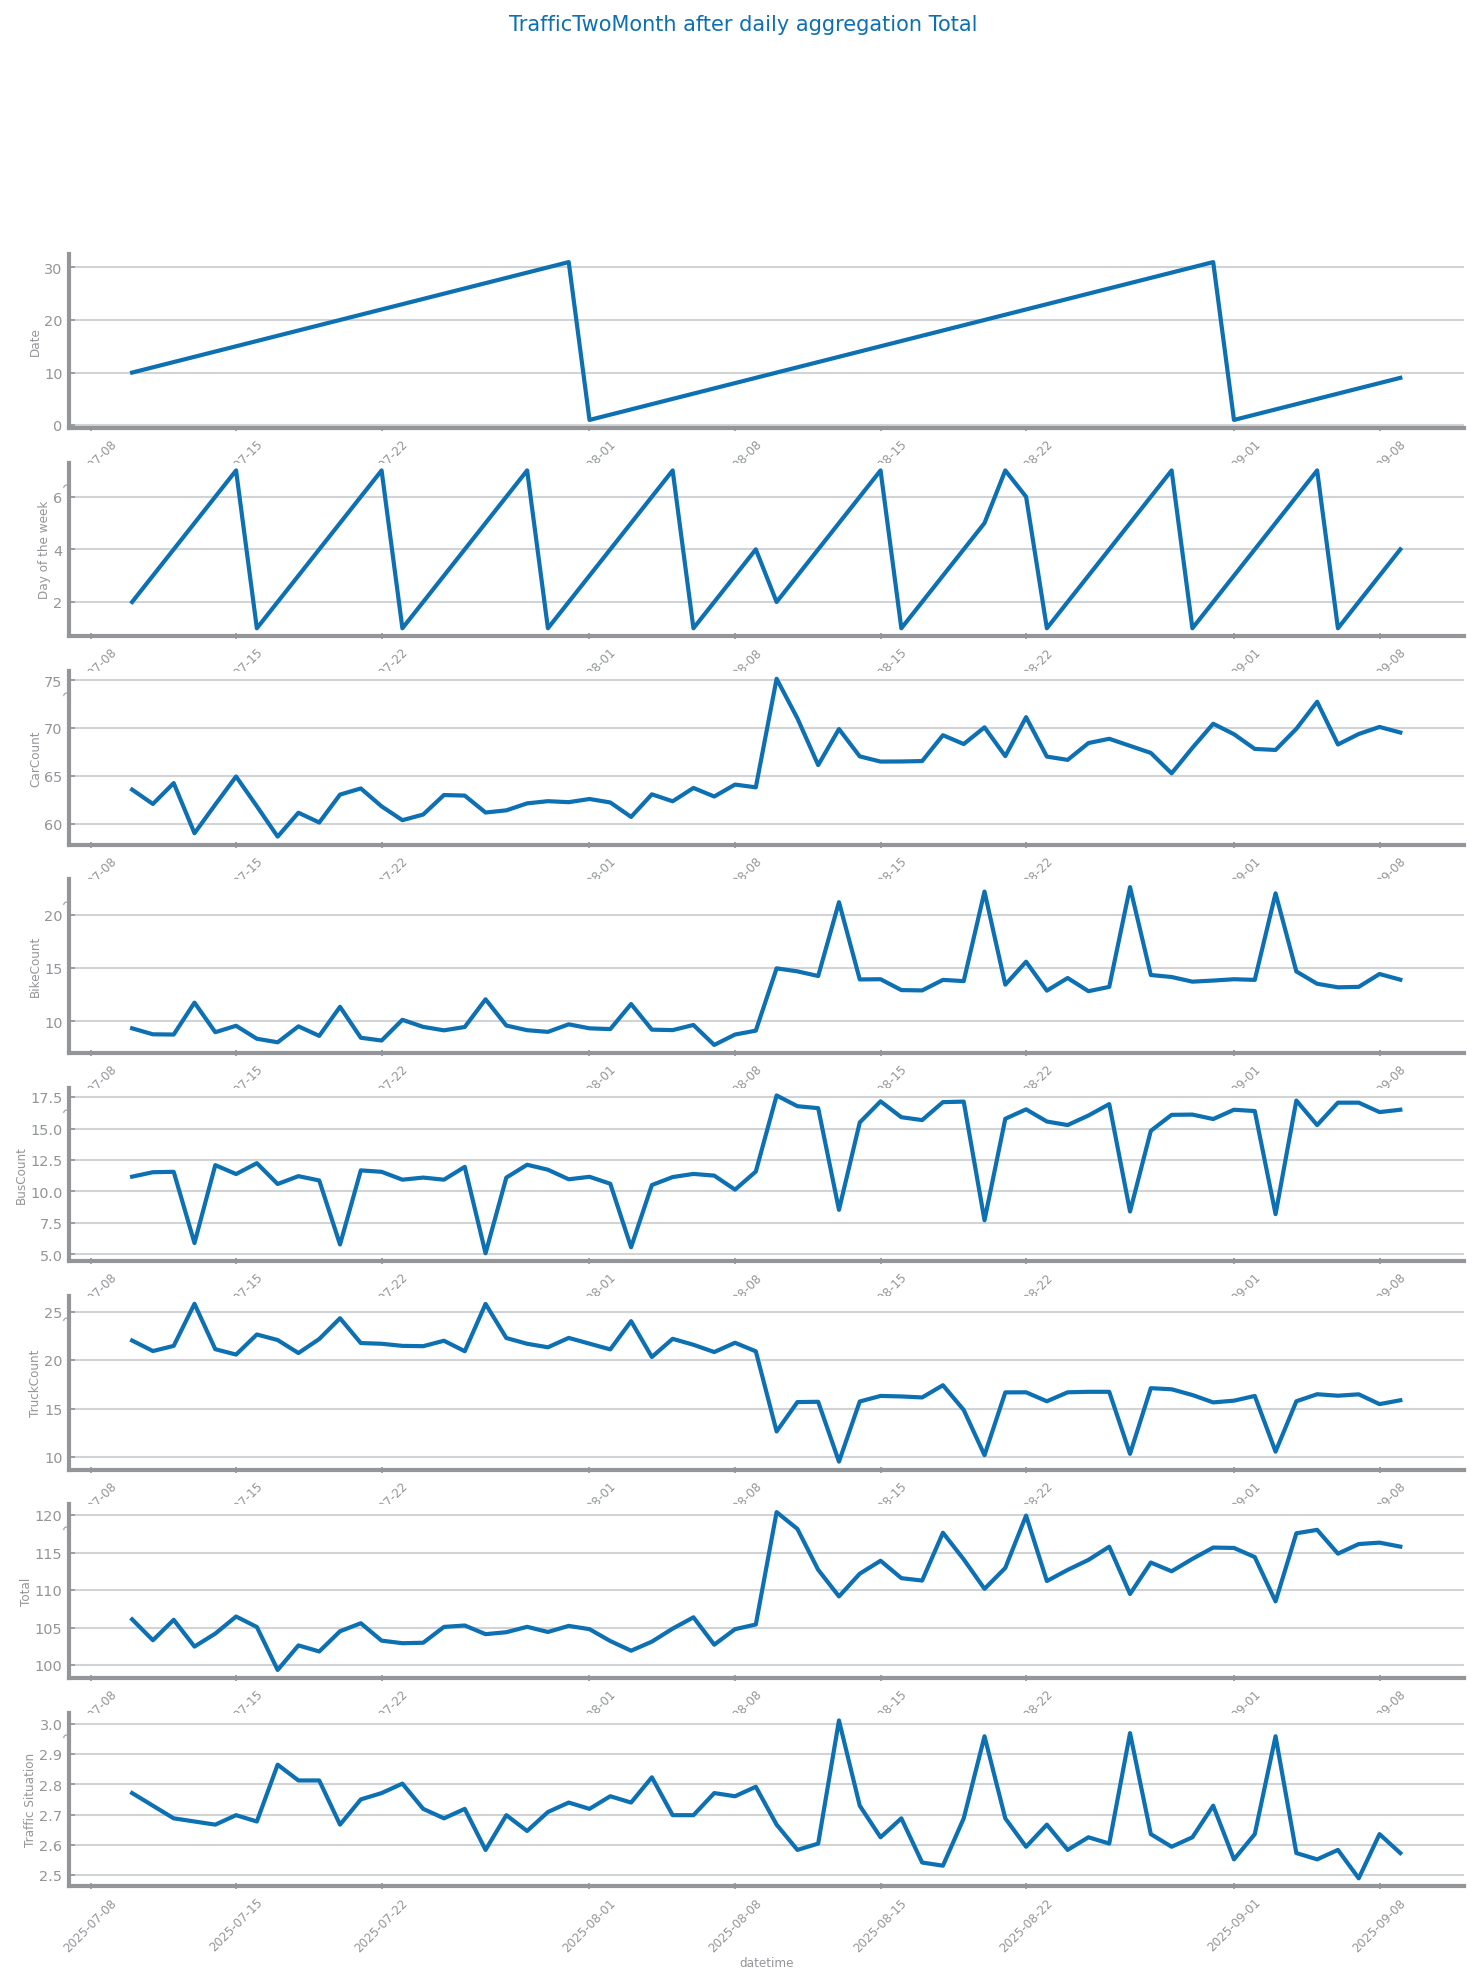

In [16]:
plot_ts_multivariate_chart(data, title=f"{file_tag} {target}")

agg_df: DataFrame = ts_aggregation_by(data, gran_level="D", agg_func="mean")

plot_ts_multivariate_chart(agg_df, title=f"{file_tag} after daily aggregation {target}")
show()

#### 2.4\. Differentiation

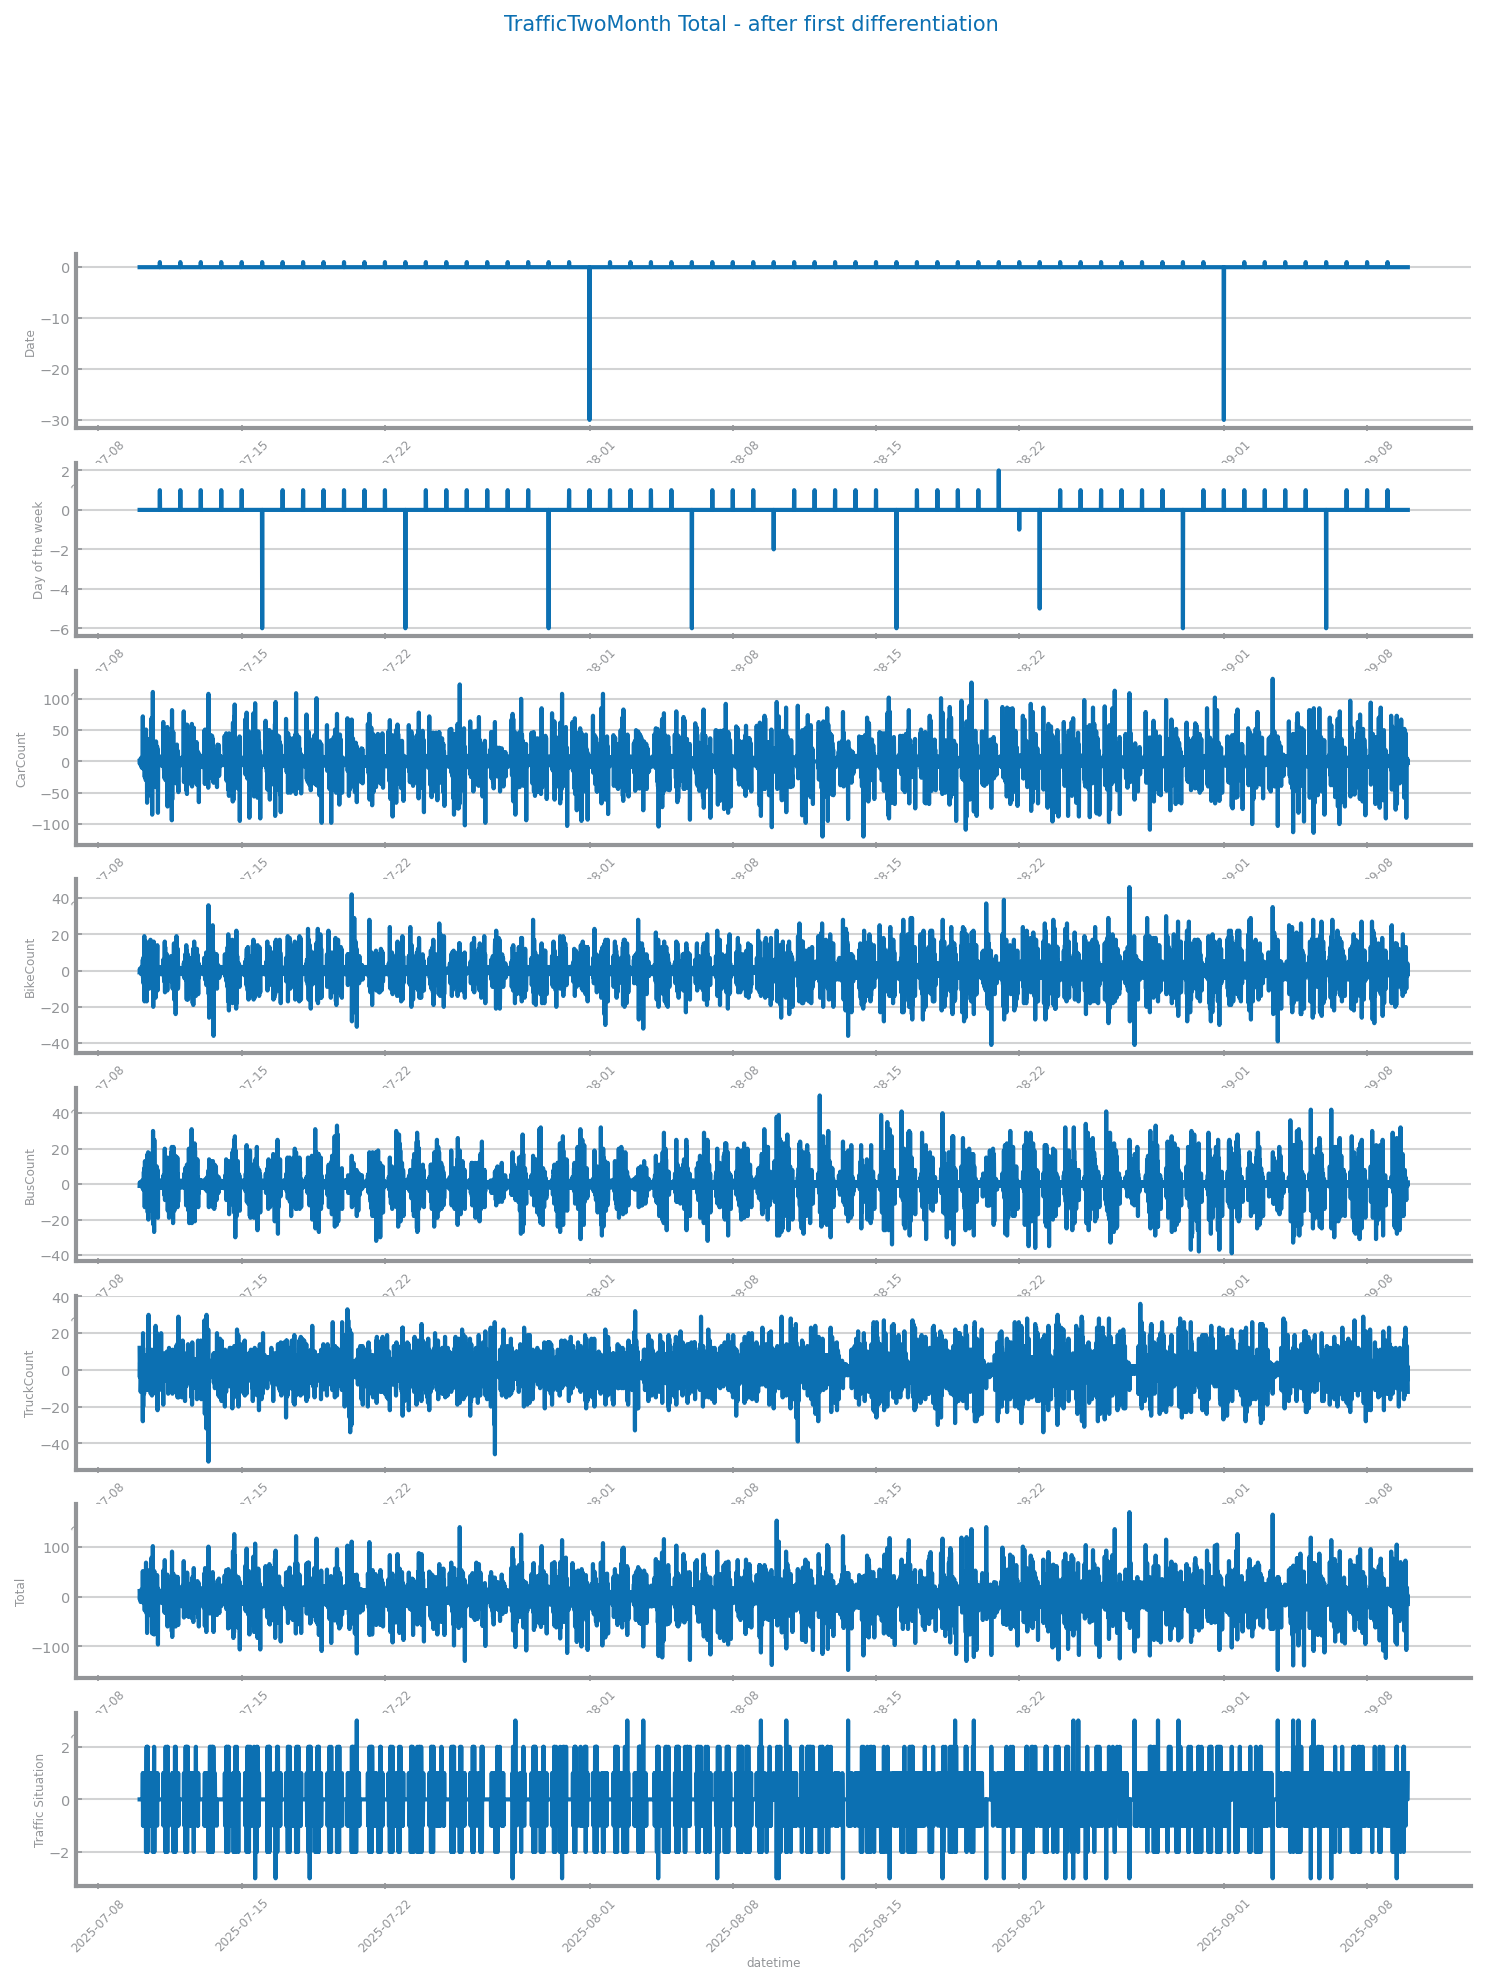

In [17]:
diff_df: DataFrame = data.diff()

plot_ts_multivariate_chart(diff_df, title=f"{file_tag} {target} - after first differentiation")
show()